##### The Question: We want to explore the changes in population caused by the institution and abolition of China's one child policy. The policy was instituted in 1979 in attempt to limit the extremely high growth rate of the already very large Chinese population. From the formation of the Communist government in 1949 through the 1960’s, families were encouraged to have as many children as possible due to the belief that it was good for the nation. In the 1970’s, the Chinese government began to consider the potential effects of overpopulation, and by 1979 the policy was developed. The policy applied to most families who were not ethnic minorities or rural farmers (who were usually allowed two children). Families where both parents were only-children were usually allowed up to two children. In practice, local governments enforced the policy by mandating contraception and sometimes abortion on couples who had already had their one child. The societal effects of this practice are fairly well documented: abortions were disproportionately used when expecting females, and female children were neglected or abandoned. What is less agreed upon, and what we plan to study, is whether the policy was effective in reducing China’s population growth rate. We will study this question by projecting the population of China into the future relative to similar countries to analyze its growth rate after the policy’s abolition in 2016.

Methodology: Our first step was to plot the historical population data over time from 1955 on. This allows us to check the validity of our model; if our model shows similar populations to the past data, we may be able to use the model to project into the future.

In [129]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

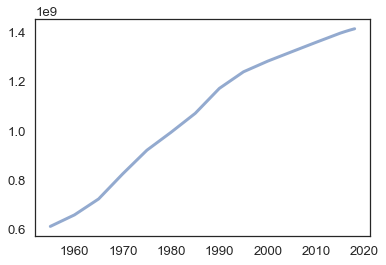

In [130]:
#past population statistics
popstats = [1415045928, 1409517397, 1403500365, 1397028553, 1359755102, 1321623490, 1283198970, 1239940004, 1172445200, 1070863389, 993877310, 920945083, 824788457, 722562183, 657686143, 610834396]
t = [2018, 2017, 2016, 2015, 2010, 2005, 2000, 1995, 1990, 1985, 1980, 1975, 1970, 1965, 1960, 1955]
plot(t, popstats)

The Model: We will represent the current population and parameters as a system variable. This system variable will be updated over time using an update function. Each simulation will be run within a runsimulation function. Sweeping through different parameters and using historical data, we will attempt to match the historical population.

In [168]:
#defining the system
pop0 = 610834396
age0 = 0.5
onechild0 = 0.2
exceptions0 = 0.02
birthrate0 = 0.1
birthrate20 = 0.1
deathrate = 0.00
system = System(pop = pop0, age = age0, onechild = onechild0, exceptions = exceptions0, birthrate = birthrate0, 
                birthrate2 = birthrate20, deathrate = deathrate0, t0 = 1955, tf = 2016)


,values
pop,10.00
age,0.50
onechild,0.20
exceptions,0.02
birthrate,0.10
birthrate2,0.10
deathrate,0.10
t0,1955.00
tf,2016.00


In [169]:
#function outputting next year's population
def update(system):
    growth1 = system.age * (system.onechild - system.exceptions) * pop * system.birthrate
    growth2 = system.age * system.exceptions * system.birthrate2
    deaths = system.deathrate * pop
    return pop + growth1 + growth2 - deaths

In [174]:
def runsimulation(system):
    i = 1954
    print(system.pop)
    while i < system.tf:
        i += 1
        print(i)
        update(system)
        print(system.pop)


In [175]:
runsimulation(system)

<bound method NDFrame.pop of pop             10.00
age              0.50
onechild         0.20
exceptions       0.02
birthrate        0.10
birthrate2       0.10
deathrate        0.10
t0            1955.00
tf            2016.00
dtype: float64>
1955
<bound method NDFrame.pop of pop             10.00
age              0.50
onechild         0.20
exceptions       0.02
birthrate        0.10
birthrate2       0.10
deathrate        0.10
t0            1955.00
tf            2016.00
dtype: float64>
1956
<bound method NDFrame.pop of pop             10.00
age              0.50
onechild         0.20
exceptions       0.02
birthrate        0.10
birthrate2       0.10
deathrate        0.10
t0            1955.00
tf            2016.00
dtype: float64>
1957
<bound method NDFrame.pop of pop             10.00
age              0.50
onechild         0.20
exceptions       0.02
birthrate        0.10
birthrate2       0.10
deathrate        0.10
t0            1955.00
tf            2016.00
dtype: float64>
1958
<bound m